# Classifying Butterflies by family



Here we're going to attempt to perform a visual classification of butterflies into one of six butterfly families based on visual features:
- Swallowtails (Family Papilionidae): Notable for having tail-like appendages at the end of the wings
- Brush-footed Butterflies (Family Nymphalidae) : The largest family of butterflies, called brush-footed for having tiny forelegs that are used as tasting appendages.
- Whites and Sulphurs (Family Pieridae) : Most Pieridae have white or yellow wings with markings in black or orange.
- Gossamer-winged Butterflies (Family Lycaenidae): Tiny butterflies that have wings that are often streaked with bright colours.
- Metalmarks (Family Riodinidae): Wings of butterflies of this family are notable for the metallic-looking spots on the wings. 
- Skippers (Family Hesperiidae): Should be the easiest to differentiate, skippers have a robust thorax similar to a moth, and antennae that end with a hook. 

Information on butterfly family class features are from https://www.thoughtco.com/learn-butterfly-families-1968213

In [3]:
from fastai import *
from fastai.vision import *
%load_ext autoreload
%autoreload 2

# Download Images & Create Directories

We're going to train the model using 200 images of butterflies taken from google images. I used a wonderful little bookmarklet made by @melonkernal to manually exclude irrelevant images to build this dataset.
https://forums.fast.ai/t/tool-for-deleting-files-on-the-google-image-search-page-before-downloading/28900

In [4]:
folder = 'Hesperiidae'
file = 'urls_Hesperiidae.txt'

In [5]:
folder = 'Lycaenidae'
file = 'urls_Lycaenidae.txt'

In [6]:
folder = 'Nymphalidae'
file = 'urls_Nymphalidae.txt'

In [7]:
folder = 'Papilionidae'
file = 'urls_Papilionidae.txt'

In [8]:
folder = 'Pieridae'
file = 'urls_Pieridae.txt'

In [7]:
folder = 'Riodinidae'
file = 'urls_Riodinidae.txt'

In [9]:


path = Path('data/butterfly-family')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [8]:
classes = ['Hesperiidae',
'Lycaenidae',
'Nymphalidae',
'Papilionidae',
'Pieridae',
'Riodinidae']

In [11]:
download_images(path/file, dest, max_pics=200)

Error https://www.ukbutterflies.co.uk/images/upload/images/Riodinidae-lucina-male.jpg 'content-length'
Error https://www.ukbutterflies.co.uk/images/upload/images/Riodinidae-lucina-female.jpg 'content-length'
Error https://www.sciencephotogallery.com/w/173/butterfly-rhetus-sp-riodinidae-ecuador-6461710.jpg 'content-length'
Error https://c8.alamy.com/comp/F0111N/metalmark-butterfly-family-riodinidae-photographed-in-sarawak-borneo-F0111N.jpg 'content-length'
Error http://www.ifoundbutterflies.org/media_images/2015/thumb/th_95_4547-399-55055457de16a-1.jpg 'content-length'
Error https://c8.alamy.com/comp/F0111W/close-up-of-a-metalmark-butterfly-family-riodinidae-photographed-in-F0111W.jpg 'content-length'
Error https://www.learnaboutbutterflies.com/Mesosemia%20loruhama%20KirstenH1151-002a.jpg 'content-length'
Error http://www.learnaboutbutterflies.com/Charis%20anius%205236-001a.jpg 'content-length'
Error https://c8.alamy.com/comp/BDC4E1/ares-metalmark-emesis-ares-butterfly-riodinidae-arizon

Process ForkProcess-24:
Process ForkProcess-23:
Process ForkProcess-21:
Process ForkProcess-22:
Process ForkProcess-20:
Process ForkProcess-18:
Process ForkProcess-17:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/andre/anaconda3/envs/fastai-course-v3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/andre/anaconda3/envs/fastai-course-v3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/andre/anaconda3/envs/fastai-course-v3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/andre/anaconda3/envs/fastai-course-v3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/andre/anaconda3/envs/fastai-course-v3

KeyboardInterrupt: 

In [14]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

Hesperiidae


cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Hesperiidae/00000056.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Hesperiidae/00000084.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Hesperiidae/00000184.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Hesperiidae/00000025.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Hesperiidae/00000116.jpg'
Lycaenidae


cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Lycaenidae/00000157.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Lycaenidae/00000016.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Lycaenidae/00000125.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Lycaenidae/00000193.jpg'
Nymphalidae


/home/andre/anaconda3/envs/fastai-course-v3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 35520512 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/andre/anaconda3/envs/fastai-course-v3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 19988480 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Nymphalidae/00000072.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Nymphalidae/00000181.jpg'


/home/andre/anaconda3/envs/fastai-course-v3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 34865152 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/andre/anaconda3/envs/fastai-course-v3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:771: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Nymphalidae/00000096.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Nymphalidae/00000089.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Nymphalidae/00000012.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Nymphalidae/00000027.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Nymphalidae/00000122.jpg'
Papilionidae


cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Papilionidae/00000059.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Papilionidae/00000141.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Papilionidae/00000053.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Papilionidae/00000184.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Papilionidae/00000179.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Papilionidae/00000177.jpg'
Pieridae


cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Pieridae/00000131.jpg'


/home/andre/anaconda3/envs/fastai-course-v3/lib/python3.7/site-packages/PIL/Image.py:2655: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/home/andre/anaconda3/envs/fastai-course-v3/lib/python3.7/site-packages/PIL/Image.py:2655: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Pieridae/00000061.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Pieridae/00000059.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Pieridae/00000101.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Pieridae/00000005.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Pieridae/00000074.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Pieridae/00000171.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Pieridae/00000052.jpg'

/home/andre/anaconda3/envs/fastai-course-v3/lib/python3.7/site-packages/PIL/Image.py:2655: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Pieridae/00000002.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Pieridae/00000164.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Pieridae/00000107.jpg'
Riodinidae


/home/andre/anaconda3/envs/fastai-course-v3/lib/python3.7/site-packages/PIL/Image.py:2655: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/home/andre/anaconda3/envs/fastai-course-v3/lib/python3.7/site-packages/PIL/Image.py:2655: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Riodinidae/00000173.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Riodinidae/00000125.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Riodinidae/00000107.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Riodinidae/00000155.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Riodinidae/00000178.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Riodinidae/00000121.jpg'
cannot identify image file '/home/andre/development/_training/ml/fastai-courses/course-v3/nbs/dl1/data/butterfly-family/Riodinidae

# Data preparation and exploration

In [10]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4, bs=12).normalize(imagenet_stats)

In [11]:
data.classes

['Hesperiidae',
 'Lycaenidae',
 'Nymphalidae',
 'Papilionidae',
 'Pieridae',
 'Riodinidae']

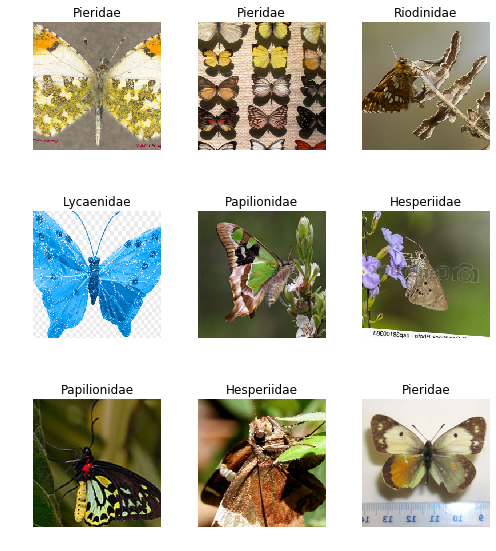

In [12]:
data.show_batch(rows=3, figsize=(7,8))

In [13]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Hesperiidae',
  'Lycaenidae',
  'Nymphalidae',
  'Papilionidae',
  'Pieridae',
  'Riodinidae'],
 6,
 813,
 233)

# Train the Model
We'll try training the model using 34 layer resnet34

In [14]:
learn = create_cnn(data, models.resnet34, metrics= error_rate)

In [15]:
learn.fit_one_cycle(20)

Total time: 06:29
epoch  train_loss  valid_loss  error_rate
1      1.800404    1.134630    0.381974    (00:20)
2      1.358070    0.837167    0.270386    (00:20)
3      1.059085    0.804948    0.278970    (00:19)
4      0.832431    0.751873    0.240343    (00:18)
5      0.756057    0.769695    0.270386    (00:18)
6      0.735054    0.700198    0.206009    (00:18)
7      0.643035    0.750343    0.244635    (00:18)
8      0.639979    0.714674    0.210300    (00:18)
9      0.528315    0.686579    0.188841    (00:19)
10     0.481103    0.661103    0.184549    (00:18)
11     0.426980    0.654021    0.197425    (00:19)
12     0.419026    0.627572    0.167382    (00:19)
13     0.359500    0.608687    0.184549    (00:19)
14     0.331996    0.613437    0.175966    (00:19)
15     0.327021    0.641424    0.175966    (00:21)
16     0.299944    0.575599    0.167382    (00:21)
17     0.257466    0.585757    0.171674    (00:20)
18     0.246610    0.618739    0.197425    (00:20)
19     0.234627    0.5

In [16]:
learn.save('stage-1')

In [17]:
learn.unfreeze()

In [20]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


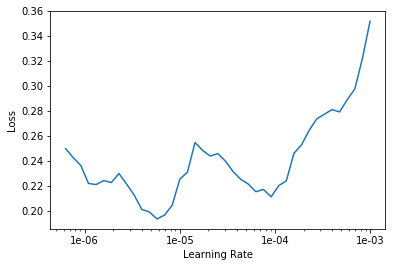

In [21]:
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(20, max_lr =slice(2e-5,1e-4))

Total time: 07:57
epoch  train_loss  valid_loss  error_rate
1      0.207331    0.580234    0.180257    (00:23)
2      0.213515    0.562330    0.180257    (00:23)
3      0.255939    0.590577    0.184549    (00:23)
4      0.198208    0.584207    0.171674    (00:23)
5      0.192376    0.620652    0.180257    (00:23)
6      0.216618    0.592446    0.167382    (00:23)
7      0.198767    0.519207    0.180257    (00:23)
8      0.180023    0.495157    0.154506    (00:23)
9      0.143513    0.713809    0.201717    (00:23)
10     0.134817    0.643658    0.167382    (00:23)
11     0.166907    0.589815    0.193133    (00:24)
12     0.096641    0.583700    0.175966    (00:24)
13     0.112540    0.586714    0.154506    (00:24)
14     0.090820    0.593770    0.171674    (00:25)
15     0.077309    0.555041    0.167382    (00:23)
16     0.057117    0.592907    0.158798    (00:23)
17     0.066305    0.557748    0.158798    (00:23)
18     0.050937    0.574900    0.180257    (00:24)
19     0.050602    0.5

In [23]:
learn.save('stage-2')

# Interpretation

In [24]:
learn.load('stage-2')

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

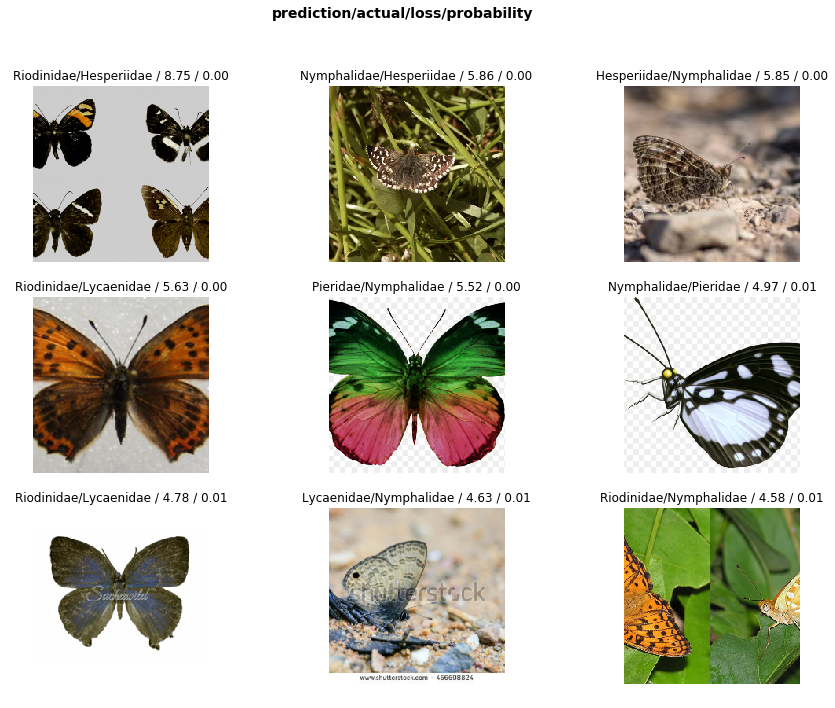

In [26]:
interp.plot_top_losses(9, figsize=(15,11))

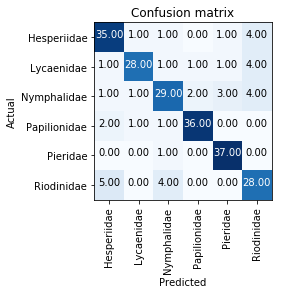

In [42]:
interp.plot_confusion_matrix()

In [43]:
interp.most_confused(min_val=2)

[('Riodinidae', 'Hesperiidae', 5),
 ('Hesperiidae', 'Riodinidae', 4),
 ('Lycaenidae', 'Riodinidae', 4),
 ('Nymphalidae', 'Riodinidae', 4),
 ('Riodinidae', 'Nymphalidae', 4),
 ('Nymphalidae', 'Pieridae', 3)]

# Cleaning Up

In [35]:
from fastai.widgets import *

losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

In [36]:
fd = FileDeleter(file_paths=top_loss_paths)

Button(button_style='primary', description='Confirm', style=ButtonStyle())

# Putting model into production

In [29]:
data.classes

['Hesperiidae',
 'Lycaenidae',
 'Nymphalidae',
 'Papilionidae',
 'Pieridae',
 'Riodinidae']

In [45]:
defaults.device = torch.device('cpu')

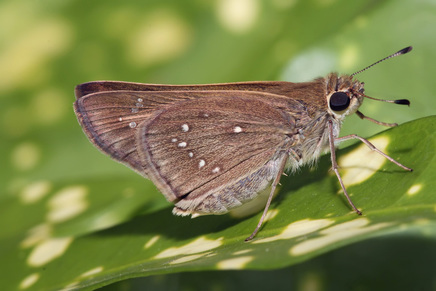

In [46]:
img = open_image(path/'Hesperiidae'/'00000089.jpg')
img

In [50]:
classes = ['Hesperiidae',
'Lycaenidae',
'Nymphalidae',
'Papilionidae',
'Pieridae',
'Riodinidae']
data2 = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load('stage-2')
learn.save('butterfly-family-classifier')

In [48]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class

'Hesperiidae'

In [52]:
learn.path, learn.model_dir

(PosixPath('data/butterfly-family'), 'models')

00_notebook_tutorial.ipynb         lesson2-download.ipynb
butterfly-family-classifier.ipynb  lesson2-planet.ipynb
data/                              lesson2-sgd-Copy1.ipynb
Flower-recognition.ipynb           lesson2-sgd.ipynb
images/                            lesson3-camvid.ipynb
lesson1-pets-Copy1.ipynb           lesson3-imdb.ipynb
lesson1-pets.ipynb
